In [2]:
include("QuickFind.jl")
include("QuickUnion.jl")
include("WQuickUnion.jl")
include("DisjointSet.jl")

using BenchmarkTools
using StatsBase
using JLD
import PyPlot; const plt = PyPlot;

PyPlot

In [4]:
d = load("benchmark.jld") # <- change this file name to the save you want to load. 

Dict{String,Any} with 11 entries:
  "benchmarkRootValuesDJU"  => BenchmarkTools.Trial[13.428 ns 13.428 ns … 13.44…
  "benchmarkFindValuesQF"   => BenchmarkTools.Trial[8.461 ns 8.467 ns … 8.461 n…
  "benchmarkUniteValuesWQU" => BenchmarkTools.Trial[15.141 ns 15.132 ns … 15.13…
  "benchmarkRootValuesWQU"  => BenchmarkTools.Trial[8.448 ns 8.444 ns … 8.444 n…
  "benchmarkFindValuesWQU"  => BenchmarkTools.Trial[13.464 ns 13.468 ns … 13.47…
  "benchmarkFindValuesDJU"  => BenchmarkTools.Trial[21.085 ns 21.085 ns … 21.07…
  "benchmarkUniteValuesDJU" => BenchmarkTools.Trial[29.444 ns 29.401 ns … 29.43…
  "benchmarkFindValuesQU"   => BenchmarkTools.Trial[13.452 ns 13.465 ns … 13.47…
  "benchmarkUniteValuesQF"  => BenchmarkTools.Trial[75.545 ns 75.545 ns … 75.51…
  "benchmarkRootValuesQU"   => BenchmarkTools.Trial[8.441 ns 8.444 ns … 8.447 n…
  "benchmarkUniteValuesQU"  => BenchmarkTools.Trial[14.302 ns 14.288 ns … 14.29…

In [5]:
ns = [100, 1000, 2500, 5000, 10000, 50000, 100000, 250000, 500000]
percents = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
xvals = zeros(9, 6)
for k = 1:Base.length(ns)
    xvals[k, :] .= ns[k]
end

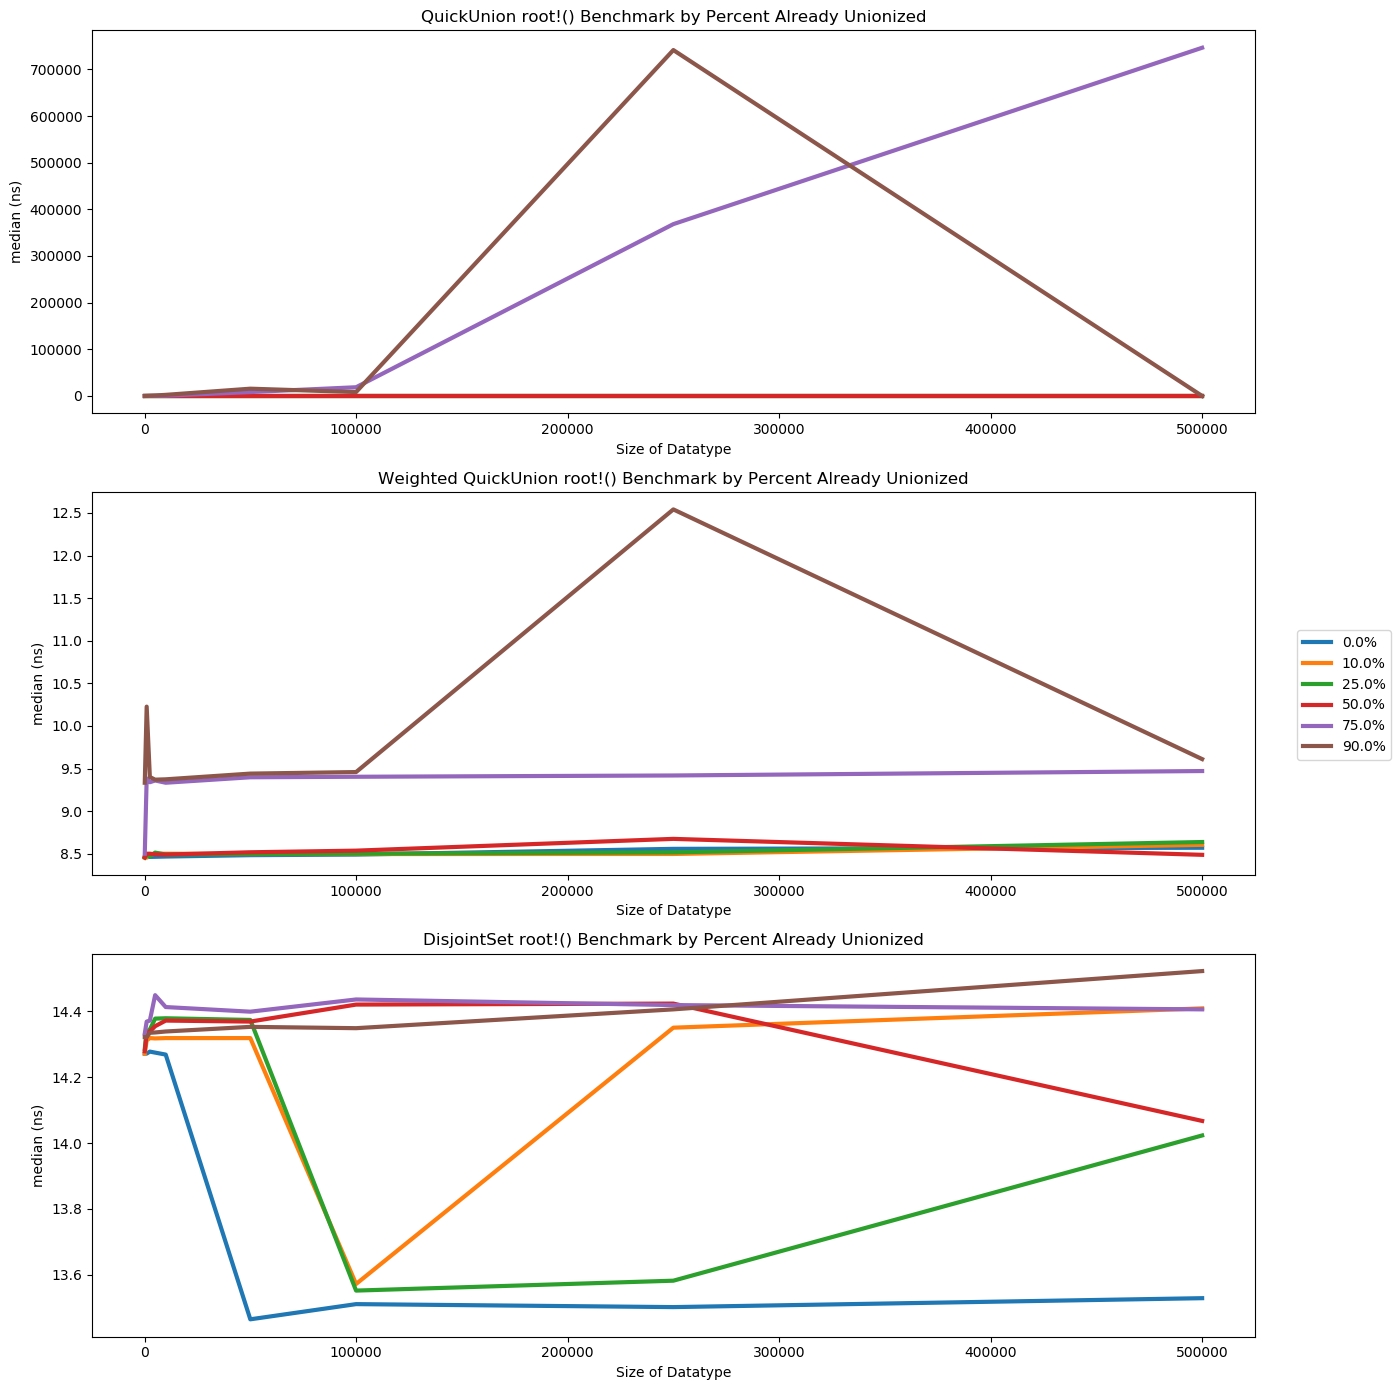

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(3) 
ax1.plot(xvals, map(k -> median(k).time, d["benchmarkRootValuesQU"]), lw=3)
ax1.set_ylabel("median (ns)") 
ax1.set_xlabel("Size of Datatype")
ax1.set_title("QuickUnion root!() Benchmark by Percent Already Unionized")

ax2.plot(xvals, map(k -> median(k).time, d["benchmarkRootValuesWQU"]), lw=3)
ax2.set_ylabel("median (ns)") 
ax2.set_xlabel("Size of Datatype")
ax2.set_title("Weighted QuickUnion root!() Benchmark by Percent Already Unionized")

ax3.plot(xvals, map(k -> median(k).time, d["benchmarkRootValuesDJU"]), lw=3)
ax3.set_ylabel("median (ns)") 
ax3.set_xlabel("Size of Datatype")
ax3.set_title("DisjointSet root!() Benchmark by Percent Already Unionized")
fig.legend(["$(k*100)%" for k in percents], loc="right")
fig.set_figheight(14)
fig.set_figwidth(14)
fig.tight_layout()
plt.subplots_adjust(right=0.9)
plt.show()


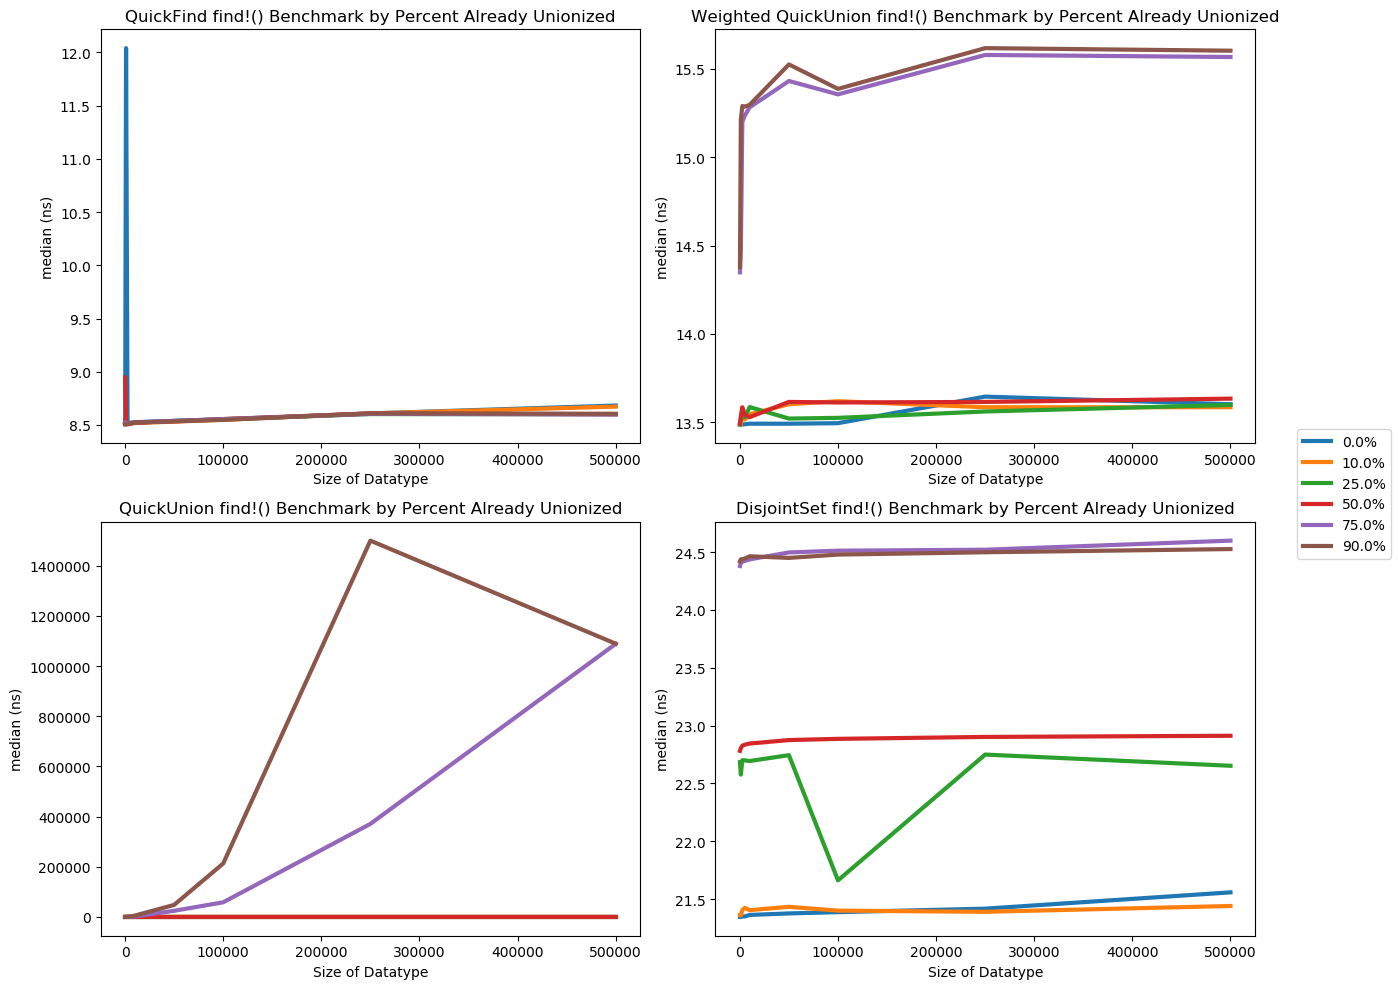

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2) 
ax1.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesQF"]), lw=3)
ax1.set_ylabel("median (ns)") 
ax1.set_xlabel("Size of Datatype")
ax1.set_title("QuickFind find!() Benchmark by Percent Already Unionized")

ax2.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesQU"]), lw=3)
ax2.set_ylabel("median (ns)") 
ax2.set_xlabel("Size of Datatype")
ax2.set_title("QuickUnion find!() Benchmark by Percent Already Unionized")

ax3.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesWQU"]), lw=3)
ax3.set_ylabel("median (ns)") 
ax3.set_xlabel("Size of Datatype")
ax3.set_title("Weighted QuickUnion find!() Benchmark by Percent Already Unionized")

ax4.plot(xvals, map(k -> median(k).time, d["benchmarkFindValuesDJU"]), lw=3)
ax4.set_ylabel("median (ns)") 
ax4.set_xlabel("Size of Datatype")
ax4.set_title("DisjointSet find!() Benchmark by Percent Already Unionized")
fig.legend(["$(k*100)%" for k in percents], loc="right")
fig.set_figheight(10)
fig.set_figwidth(14)
fig.tight_layout()
fig.subplots_adjust(right=0.9)
plt.show()


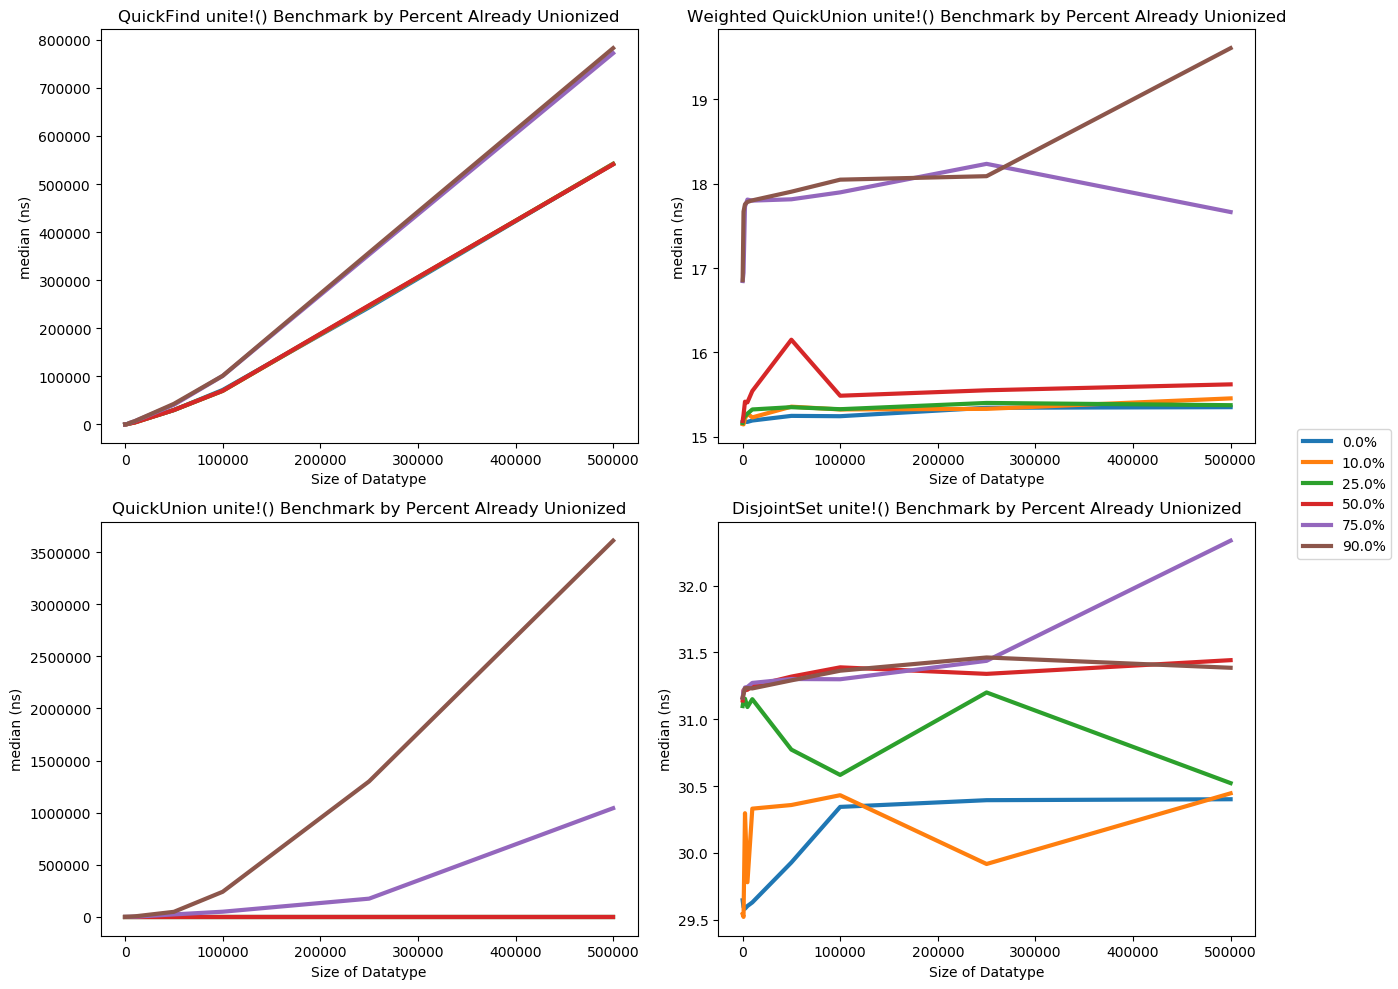

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2) 
ax1.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesQF"]), lw=3)
ax1.set_ylabel("median (ns)") 
ax1.set_xlabel("Size of Datatype")
ax1.set_title("QuickFind unite!() Benchmark by Percent Already Unionized")

ax2.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesQU"]), lw=3)
ax2.set_ylabel("median (ns)") 
ax2.set_xlabel("Size of Datatype")
ax2.set_title("QuickUnion unite!() Benchmark by Percent Already Unionized")

ax3.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesWQU"]), lw=3)
ax3.set_ylabel("median (ns)") 
ax3.set_xlabel("Size of Datatype")
ax3.set_title("Weighted QuickUnion unite!() Benchmark by Percent Already Unionized")

ax4.plot(xvals, map(k -> median(k).time, d["benchmarkUniteValuesDJU"]), lw=3)
ax4.set_ylabel("median (ns)") 
ax4.set_xlabel("Size of Datatype")
ax4.set_title("DisjointSet unite!() Benchmark by Percent Already Unionized")
fig.legend(["$(k*100)%" for k in percents], loc="right")
fig.set_figheight(10)
fig.set_figwidth(14)
fig.tight_layout()
fig.subplots_adjust(right=0.9)
plt.show()